In [3]:
# copy the file over like this:
# scp machinekit@192.168.0.45:bbhquad/PRUcode/deltatime/prujolt3.txt .

import re
fin = open("prujolt4.txt")
k = fin.read().split()
jlts = [ ]
for kk in k:
    if "." in kk:
        jlts.append((float(re.search("(-?\d\.\d*)", kk).group(1)), [], []))
    else:
        jlts[-1][1 if len(jlts[-1][1]) == len(jlts[-1][2]) else 2].append(int(kk))



In [4]:
jlts[4][2][:10]

[1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681]

-4.7


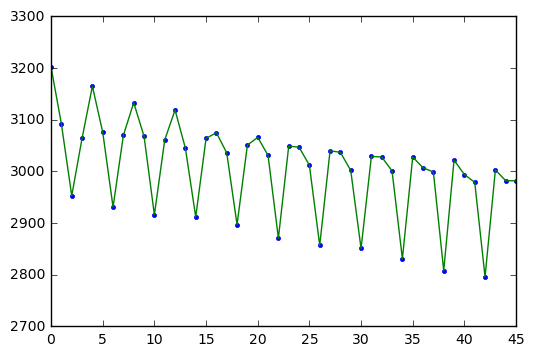

In [5]:
%matplotlib inline
from matplotlib.pyplot import plot

i = 3
print(jlts[i][0])
#plot([1/k  for k in jlts[i][1][2:]])
#plot([k  for k in jlts[i][2][2:]])
k = jlts[i][1][2:]
plot(k[80::1], '.')
plot(k[80::1])


138282


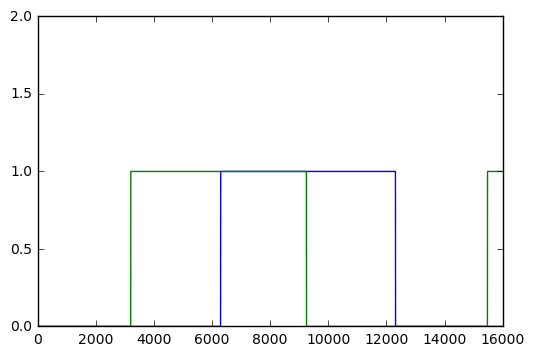

In [44]:
al = []
bl = []
a = 0
b = 0
ctf = 0
count = 0

for ks in k[80::1]:
    for x in range(ks):
        al.append(a)
        bl.append(b)
        count+=1
    if ctf:
        a^=1
    else:
        b^=1
    ctf^=1

print (count)
        
import matplotlib.pyplot as plt

#zoomed in at first quad sequence:
plt.axis([0,16000,0,2])
plt.plot (al)
plt.plot (bl)


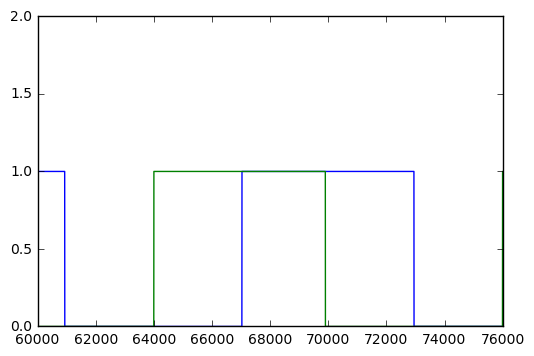

In [45]:
#one from the middle (same scale):

plt.axis([60000,76000,0,2])
plt.plot (al)
plt.plot (bl)

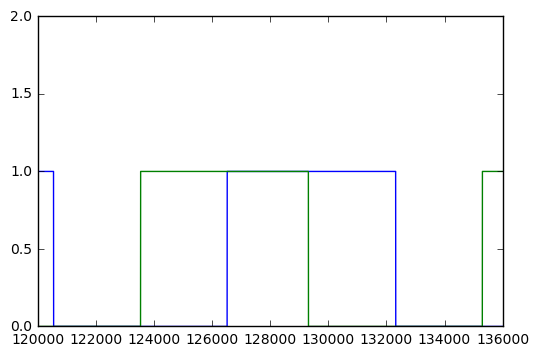

In [46]:
#one near the end:

plt.axis([120000,136000,0,2])
plt.plot (al)
plt.plot (bl)

In [85]:
k = jlts[i][1][103:]
[(k[i+1]-k[i], k[i+2]-k[i], k[i+3]-k[i])  for i in range(0, len(k)-4, 4)]
k[0]*40

290440

In [ ]:

jlts = [ ]
for lin in fin:
    k = lin.split()
    v = float(k[0])
    ts = [int(k[i])*1e-6  for i in range(1, len(k), 2)]
    ps = [(int(k[i+1])-int(k[2]))/2000  for i in range(1, len(k), 2)]
    jlts.append((v, ts, ps))
    

In [242]:
len(jlts[0][1])

1319

In [253]:
%matplotlib inline
from matplotlib.pyplot import plot

jlt = jlts[2]
v = jlt[0]
ts = jlt[1][:]
ps = jlt[2][:]
badi = [ i  for i in range(1, len(ts)-1)  if max(abs(ts[i]-ts[i-1]-6.1e-5), abs(ts[i+1]-ts[i]-6.1e-5))>5e-5 ]
#td = [ts[i]-ts[i-1]  for i in range(1, len(ts))]
#plot(ts[1:], td)
badi.append(0)
badi.append(len(ts)-1)
badi.sort(reverse=True)
for i in badi:
    del ts[i]
    del ps[i]
#plot(ts, ps)
len(badi), len(ts)

from scipy.optimize import leastsq

def f(x, m, c, d, k):
    return np.exp(-x*d)*k + m*x + c
def func(params):
    return f(ts, *params) - ps
ts = np.asarray(ts)
ps = np.asarray(ps)

m, c, d, k = leastsq(func, np.ones(4), full_output=1)[0]
m, c, d, k, v, len(badi), len(ts)

(18.613819713734333,
 5.7218599850902843,
 -3.4555762023439702,
 -5.7172775036792665,
 -4.8,
 18,
 1271)

In [200]:
from scipy.optimize import curve_fit
curve_fit?

In [252]:
#v, ts, ps = jlts[2]
import numpy as np
print(len(ts))
from scipy.optimize import curve_fit
def f(x, m, c, d, k):
    return np.exp(-x*d)*k + m*x + c
popt, pcov = curve_fit(f, ts[400::5], ps[400::5], method="trf")
m, c, d, k = popt
popt, pcov



1271


(array([ -4.39277744,   0.08685483,  51.32331504,  -0.08480917]),
 array([[  8.00966382e-04,  -5.61354534e-05,   4.22605160e-02,
           4.13695822e-05],
        [ -5.61354534e-05,   3.94203041e-06,  -2.98148048e-03,
          -2.88906500e-06],
        [  4.22605160e-02,  -2.98148048e-03,   2.28396804e+00,
           2.14801752e-03],
        [  4.13695822e-05,  -2.88906500e-06,   2.14801752e-03,
           2.16889580e-06]]))

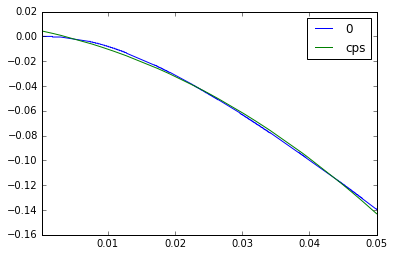

In [254]:
import pandas as pd
df = pd.DataFrame(ps, index=ts)
df["cps"] = [f(x, m, c, d, k)  for x in ts]
df.plot()


In [135]:
%matplotlib inline
df["cps"] = [f(x, m, c, d, k)  for x in ts]
df.plot()


ValueError: Length of values does not match length of index

In [116]:
def f(x, m, c):
    return m*x + c
vs = [ ]
ms = [ ]
for v, ts, ps in jlts:
    i = len(ts) - int(len(ts)/2)
    popt, pcov = curve_fit(f, ts[i:], ps[i:])
    vs.append(v)
    ms.append(popt[0])
%matplotlib inline
plot(vs, ms)

-5.0

In [259]:
def f(x, m, c, d, k):
    return np.exp(-x*d)*k + m*x + c
vs = [ ]
ms = [ ]
ds = [ ]
for v, ts, ps in jlts:
    ts = ts[:]
    ps = ps[:]
    badi = [ i  for i in range(1, len(ts)-1)  if max(abs(ts[i]-ts[i-1]-6.1e-5), abs(ts[i+1]-ts[i]-6.1e-5))>5e-5 ]
    badi.append(0)
    badi.append(len(ts)-1)
    badi.sort(reverse=True)
    for i in badi:
        del ts[i]
        del ps[i]

    def func(params):
        return f(ts, *params) - ps
    ts = np.asarray(ts)
    ps = np.asarray(ps)
    m, c, d, k = leastsq(func, np.ones(4), full_output=1)[0]
          
    #try:
    #    popt, pcov = curve_fit(f, ts, ps)
    #except RuntimeError as e:
    #    print(v, e)
    #    continue
    vs.append(v)
    ms.append(m)
    ds.append(d)
%matplotlib inline

df = pd.DataFrame(ps, ds, index=ts)
df.plot()


TypeError: __init__() got multiple values for argument 'index'

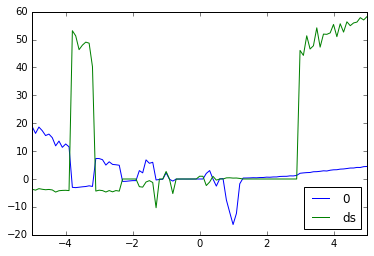

In [265]:
df = pd.DataFrame(ms, index=vs)
df["ds"] = ds
df.plot()


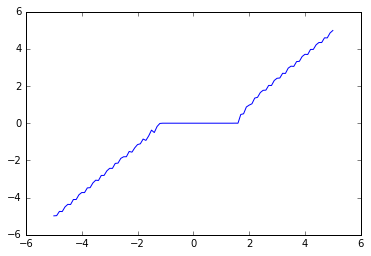